In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data',index_col=0)

In [3]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [4]:
data.columns.isna().sum()

0

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data.drop('TARGET CLASS',axis=1))
scalled_data=scaler.transform(data.drop('TARGET CLASS',axis=1))

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scalled_data,data['TARGET CLASS'],test_size=0.3)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))

[[132  15]
 [  6 147]]
0.93


In [9]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       147
           1       0.91      0.96      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [10]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    y_pred=knn.predict(test_x)
    error_rate.append(np.mean(y_pred!=test_y))

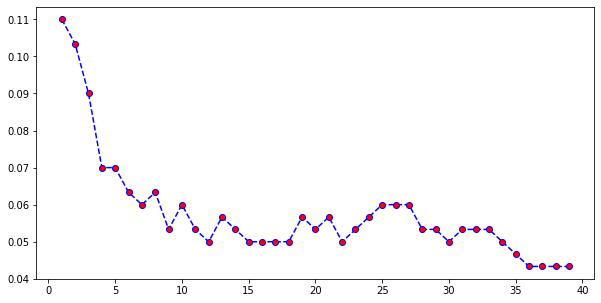

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')

## As We See in Barplot When No Of K ' n_neighbors=10 ' then error rate is low i.e 0.050

In [12]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)

In [13]:
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))

[[136  11]
 [  7 146]]
0.94


In [14]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       147
           1       0.93      0.95      0.94       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

